# Artificial Neural Networks Classification Exercise 

Import the file `NetworkIntrusionDataset.csv` from the data folder as a pandas DataFrame called `data`. 

This dataset is designed for predicting network intrusion attacks on computer systems. It contains 41 features extracted from network data packet records, which include duration of the connection, protocol type, data bytes sent from source to destination, number of failed logins, and similar.  Besides the network data packet records, the dataset also contains a `label` column that indicates whether a network record is normal traffic or an attack, and an `attack` column that indicates the type of the network attack. The dataset has 125,973 records.

This exercise first applies binary classification to predict whether a record is an attack or normal data traffic, and afterward applies  multiclass classification to predict the attack type of each record.

In [ ]:

import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [5]:
data = pd.read_csv('data/NetworkIntrusionDataset.csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


## Exploratory Data Analysis

Perform a brief Exploratory Data Analysis. Display summary statistics, and check if there are missing values (and if yes, handle the missing values).

In [ ]:

# data info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.465417
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.498805
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


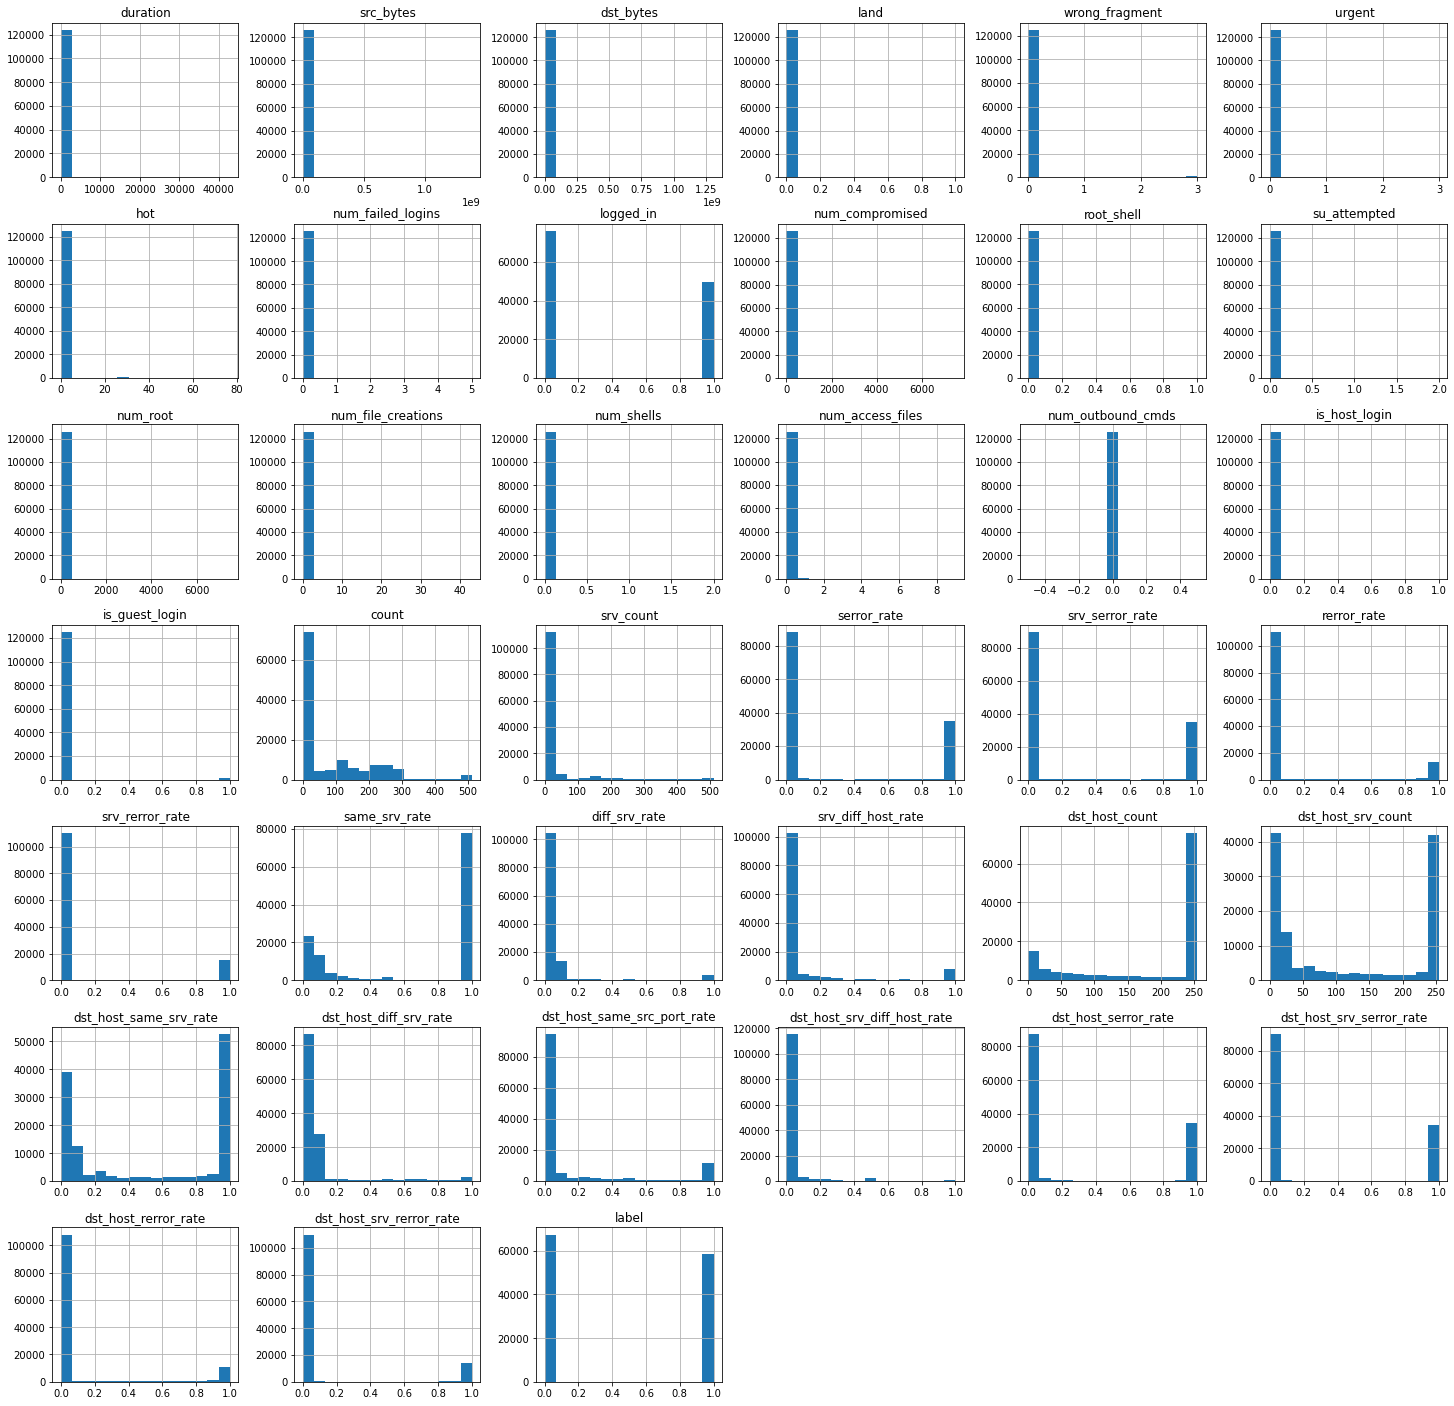

In [18]:
numerical_features = data.select_dtypes(include = 'number')
numerical_features.hist(bins = 15, figsize = (25,25));

Print the number of normal traffic (0) and attack (1) samples in the dataset.

In [22]:
data['label'].value_counts()

0    67343
1    58630
Name: label, dtype: int64

Using Seaborn, create a count plot to show the distribution of the normal traffic and attack samples in the dataset. 

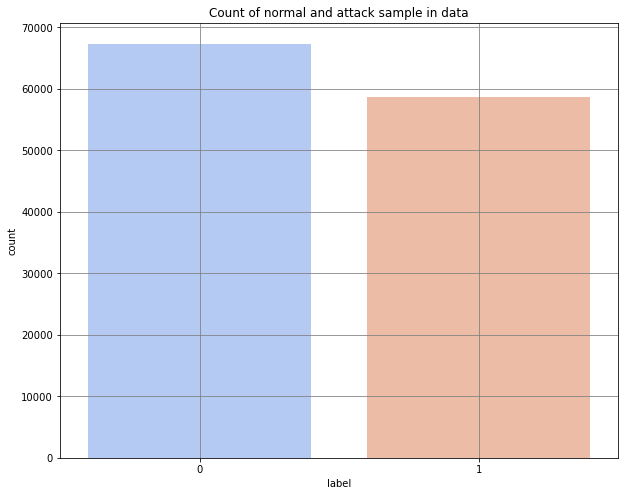

In [35]:
plt.figure(figsize = (10,8))
sns.countplot(data = data,x = 'label', palette = 'coolwarm')
plt.title('Count of normal and attack sample in data')
plt.grid(color = 'grey', linestyle = '-')
plt.show()

Print the number of samples of all attacks in the dataset.

In [36]:
data['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

Using Seaborn, create a count plot to show the distribution of the samples for the normal traffic and for each attack in the dataset. 

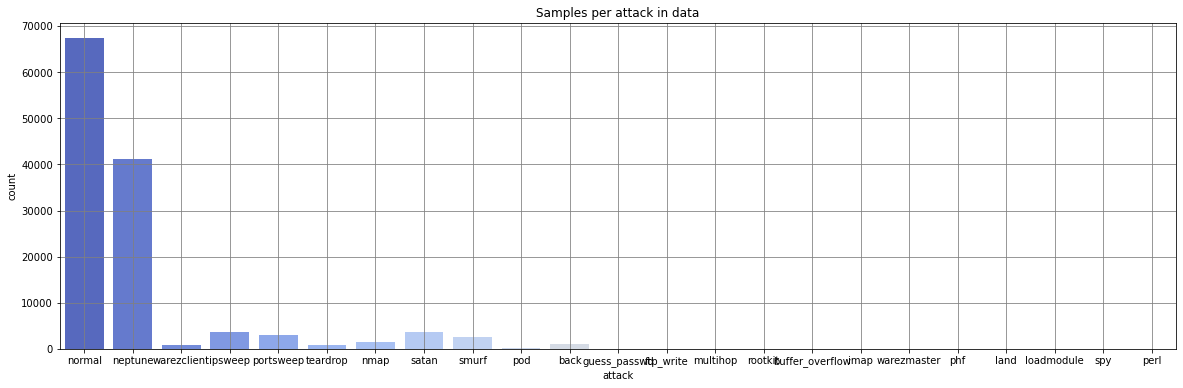

In [38]:
plt.figure(figsize = (20,6))
sns.countplot(data = data,x = 'attack', palette = 'coolwarm')
plt.title('Samples per attack in data')
plt.grid(color = 'grey', linestyle = '-')
plt.show()

Print the number of attack categories in the dataset.

In [39]:
data['attack'].nunique()

23

## Part 1 - Binary Classification 

In [40]:
data.shape

(125973, 43)

### Data Preparation

Encode the categorical features in the dataset into ordinal features using Ordinal Encoder. 

Assign the `label` column to target variable. For the data features variable, drop the `attack` and `label` columns, so that there are 41 columns left. 

Afterward, create training and testing datasets by using 75% of the data for training and 25% for testing (use `random seed=123`), and normalize the data to the range [0,1]. Display the shapes of the features and targets in the training and testing datasets.

In [ ]:

# process ordinal features
from sklearn.preprocessing import OrdinalEncoder

object_features = data.select_dtypes(include = 'object')

encoderOrdianl = OrdinalEncoder()

object_feats_encoded = encoderOrdianl.fit_transform(object_features)
object_feats_encoded

array([[ 1., 20.,  9., 11.],
       [ 2., 44.,  9., 11.],
       [ 1., 49.,  5.,  9.],
       ...,
       [ 1., 54.,  9., 11.],
       [ 1., 30.,  5.,  9.],
       [ 1., 20.,  9., 11.]])

In [50]:
data[['protocol_type', 
      'service', 
      'flag', 
      'attack']] = pd.DataFrame(object_feats_encoded, 
                                columns = object_features.columns,
                                index = object_features.index)

In [58]:
y_label = data['label']
y_attack = data['attack']
X = data.drop(['label','attack'], axis = 1)

In [65]:
X_train, X_test, y_label_train, y_label_test = train_test_split(X,y_label, test_size = 0.25, random_state = 123, stratify = y_label)

In [62]:
minmaxscaler = MinMaxScaler()
X_train_scaled = minmaxscaler.fit_transform(X_train)
X_test_scaled = minmaxscaler.transform(X_test)

In [66]:
print('X_train_scaled shape: ', X_train_scaled.shape)
print('X_test_scaled shape: ', X_test_scaled.shape)
print('y_label_train shape: ', y_label_train.shape)
print('y_label_test shape: ', y_label_test.shape)

X_train_scaled shape:  (94479, 41)
X_test_scaled shape:  (31494, 41)
y_label_train shape:  (94479,)
y_label_test shape:  (31494,)


### Train ML Classifiers

Train and evaluate the following ML classifiers: Logistic Regression, Random Forest, Decision Trees, Support Vector Machines, k-Nearest Neighbors, and Naive Bayes.

In [ ]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_label = LogisticRegression()
lr_label.fit(X_train_scaled, y_label_train)
accuracy_lr_label = lr_label.score(X_test_scaled, y_label_test)

print('Test score: %5.4f' % (accuracy_lr_label))

Test score: 0.9559


/Users/wly/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf_label = RandomForestClassifier()
rf_label.fit(X_train_scaled, y_label_train)
accuracy_rf_label = rf_label.score(X_test_scaled, y_label_test)

print(f'Test Score: {accuracy_rf_label:5.4f}')

Test Score: 0.9985


In [77]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_label = DecisionTreeClassifier()
dt_label.fit(X_train_scaled, y_label_train)
accuracy_dt_label = dt_label.score(X_test_scaled, y_label_test)

print('Test Score: {0:5.4f}'.format(accuracy_dt_label))

Test Score: 0.9972


In [79]:
# Support Vector Machine
from sklearn.svm import SVC

svm_label = SVC()
svm_label.fit(X_train_scaled, y_label_train)
accuracy_svm_label = svm_label.score(X_test_scaled, y_label_test)

print('Test Score: {0:5.4f}'.format(accuracy_svm_label))

Test Score: 0.9670


In [82]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier 

knn_label = KNeighborsClassifier()
knn_label.fit(X_train_scaled, y_label_train)
accuracy_knn_label = knn_label.score(X_test_scaled, y_label_test)

print('Test Score: {0:5.4f}'.format(accuracy_knn_label))

/Users/wly/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Score: 0.9954


In [86]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_label = GaussianNB()
nb_label.fit(X_train_scaled, y_label_train)
accuracy_nb_label = nb_label.score(X_test_scaled, y_label_test)

print('Test Score: %5.2f'%(accuracy_nb_label))

Test Score:  0.90


### Train ANNs 

Create an ANN model with 3 hidden layers having 100, 50, and 20 neurons, called `model_1`. Train the model for 100 epochs and evaluate it on the test dataset. Plot the learning curves. 

In [ ]:

# define the layers 
inputs = Input(shape=(41,))
dense1 = Dense(100,activation = 'relu')(inputs)
dense2 = Dense(50, activation = 'relu')(dense1)
dense3 = Dense(20, activation = 'relu')(dense2)
outputs = Dense(1, activation = 'sigmoid')(dense3)

In [102]:
# define the model by providing the inputs and outputs

model_1 = Model(inputs, outputs)
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 10,291
Trainable params: 10,291
Non-trainable params: 0
_________________________________________________________________


In [103]:
# compile the model
model_1.compile(loss = 'binary_crossentropy',                       
             optimizer = 'adam',
             metrics = ['accuracy'])

In [106]:
# train the model
history1 = model_1.fit(X_train_scaled, y_label_train,epochs = 100, batch_size = 64, verbose = 0)

In [110]:
# evaluate model_1 on test data
evals = model_1.evaluate(X_test_scaled, y_label_test)
print('Evaluation Accuracy On Test Data: %5.2f'%(evals[1]))

985/985 [==============================] - 1s 680us/step - loss: 0.0102 - accuracy: 0.9971
Evaluation Accuracy On Test Data:  1.00


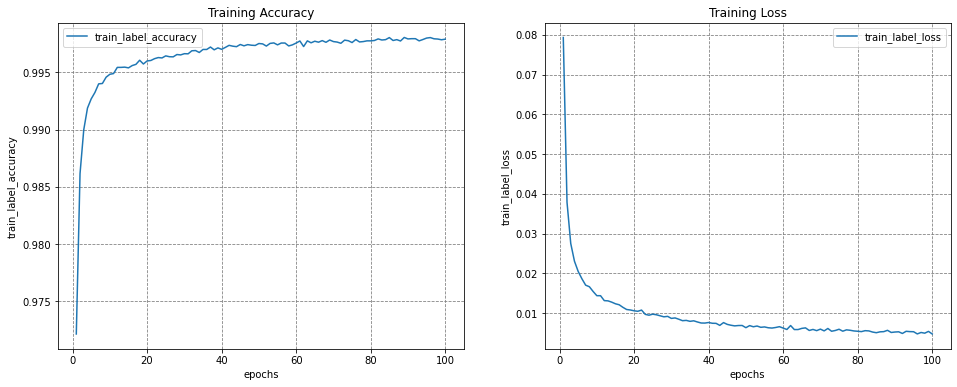

In [118]:
# Plot the learning curve
train_label_accuracy = history1.history['accuracy']
train_label_loss = history1.history['loss']
epochsn = np.arange(1,len(train_label_accuracy)+1, 1)

plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
plt.plot(epochsn, train_label_accuracy, label = 'train_label_accuracy')
plt.xlabel('epochs')
plt.ylabel('train_label_accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.grid(color = 'grey', linestyle = '--')

plt.subplot(1,2,2)
plt.plot(epochsn, train_label_loss, label = 'train_label_loss')
plt.xlabel('epochs')
plt.ylabel('train_label_loss')
plt.title('Training Loss')
plt.grid(color = 'grey', linestyle = '--')
plt.legend()

plt.show()

Create another ANN model called `model_2` that is larger, and may have several hundreds or thousands neurons in each layer, and/or larger number of layers. Train the model and evaluate it on the test dataset. Plot the learning curves.

In [119]:
# define the layers 
inputs = Input(shape=(41,))
dense1 = Dense(200, activation = 'relu')(inputs)
dense2 = Dense(100, activation = 'relu')(dense1)
dense3 = Dense(50, activation = 'relu')(dense2)
dense4 = Dense(20, activation = 'relu')(dense3)
outputs = Dense(1, activation = 'sigmoid')(dense4)

In [120]:
# define the model by providing the inputs and outputs

model_2 = Model(inputs, outputs)
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_12 (Dense)            (None, 200)               8400      
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 20)                1020      
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 34,591
Trainable params: 34,591
Non-trainable

In [121]:
# compile the model
model_2.compile(loss = 'binary_crossentropy',                       
             optimizer = 'adam',
             metrics = ['accuracy'])

In [122]:
# train the model
history2 = model_2.fit(X_train_scaled, y_label_train,epochs = 100, batch_size = 64, verbose = 0)

In [123]:
# evaluate model_1 on test data
evals_2 = model_2.evaluate(X_test_scaled, y_label_test)
print('Evaluation Accuracy On Test Data: %5.2f'%(evals_2[1]))

985/985 [==============================] - 1s 866us/step - loss: 0.0139 - accuracy: 0.9970
Evaluation Accuracy On Test Data:  1.00


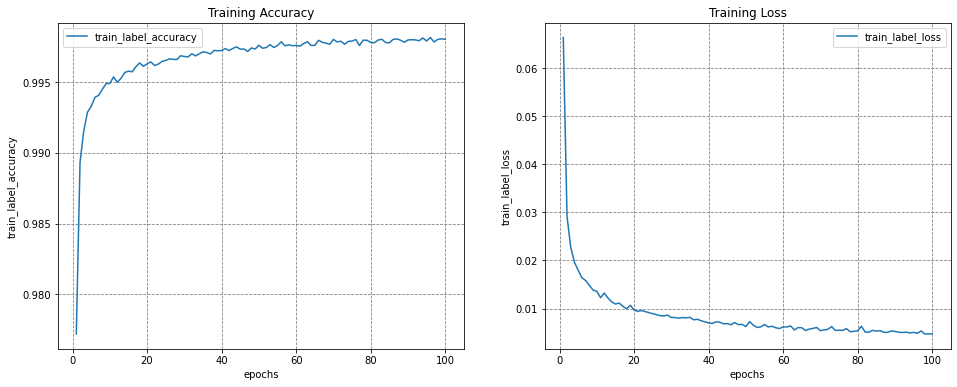

In [125]:
# Plot the learning curve
train_label_accuracy = history2.history['accuracy']
train_label_loss = history2.history['loss']
epochsn = np.arange(1,len(train_label_accuracy)+1, 1)

plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
plt.plot(epochsn, train_label_accuracy, label = 'train_label_accuracy')
plt.xlabel('epochs')
plt.ylabel('train_label_accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.grid(color = 'grey', linestyle = '--')

plt.subplot(1,2,2)
plt.plot(epochsn, train_label_loss, label = 'train_label_loss')
plt.xlabel('epochs')
plt.ylabel('train_label_loss')
plt.title('Training Loss')
plt.grid(color = 'grey', linestyle = '--')
plt.legend()

plt.show()

### Report the Performance

Report the accuracy of the models in the following table.

| Model | Accuracy (%) |
| --- | --- |
| Logistic Regression | 95.59% |
| Random Forest | 99.85% |
| Decision Trees | 99.72% |
| Support Vector Machines | 96.70% |
| k-Nearest Neighbors | 99.54% |
| Naive Bayes | 90.00% |
| ANN - model_1 | 100% |
| ANN - model_2 | 100% |

## Part 2 - Multiclass Classification

### Data Preparation

For multiclass classification, assign the `attack` column to target variable. For the data features variable, drop the `attack` and `label` columns, so that there are 41 columns left. 

Split the data into training and testing datasets (use `random seed=123`), and normalize the data to the range [0,1]. Display the shapes of the features and targets in the training and testing datasets.

In [ ]:

# split data into training data and test data
X_train_2, X_test_2, y_attack_train, y_attack_test = train_test_split(X,y_attack, test_size = 0.25, random_state = 123)

In [133]:
# normalize data into range[0,1]
minmaxscaler = MinMaxScaler()
X_train_scaled_2 = minmaxscaler.fit_transform(X_train_2)
X_test_scaled_2 = minmaxscaler.transform(X_test_2)

In [135]:
print('X_train_scaled_2 shape: ', X_train_scaled_2.shape)
print('X_test_scaled_2 shape: ', X_test_scaled_2.shape)
print('y_attack_train shape: ', y_attack_train.shape)
print('y_attack_test shape: ', y_attack_test.shape)

X_train_scaled_2 shape:  (94479, 41)
X_test_scaled_2 shape:  (31494, 41)
y_attack_train shape:  (94479,)
y_attack_test shape:  (31494,)


### Train ML Classifiers

Train and evaluate the same ML classifiers from Part 1: Logistic Regression, Random Forest, Decision Trees, Support Vector Machines, k-Nearest Neighbors, and Naive Bayes.

In [ ]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_attack = LogisticRegression()
lr_attack.fit(X_train_scaled_2, y_attack_train)
accuracy_lr_attack = lr_attack.score(X_test_scaled_2, y_attack_test)

print('Test score: %5.4f' % (accuracy_lr_attack ))

Test score: 0.9788


/Users/wly/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf_attack = RandomForestClassifier()
rf_attack.fit(X_train_scaled_2, y_attack_train)
accuracy_rf_attack = rf_attack.score(X_test_scaled_2, y_attack_test)

print(f'Test Score: {accuracy_rf_attack:5.4f}')

Test Score: 0.9974


In [142]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_attack = DecisionTreeClassifier()
dt_attack.fit(X_train_scaled_2, y_attack_train)
accuracy_dt_attack = dt_attack.score(X_test_scaled_2, y_attack_test)

print('Test Score: {0:5.4f}'.format(accuracy_dt_attack))

Test Score: 0.9957


In [144]:
# Support Vector Machine
from sklearn.svm import SVC

svm_attack = SVC()
svm_attack.fit(X_train_scaled_2[0:1000], y_attack_train[0:1000])
accuracy_svm_attack = svm_attack.score(X_test_scaled_2, y_attack_test)

print('Test Score: {0:5.4f}'.format(accuracy_svm_attack))

Test Score: 0.9561


In [145]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier 

knn_attack = KNeighborsClassifier()
knn_attack.fit(X_train_scaled_2, y_attack_train)
accuracy_knn_attack = knn_attack.score(X_test_scaled_2, y_attack_test)

print('Test Score: {0:5.4f}'.format(accuracy_knn_attack))

/Users/wly/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Score: 0.9939


In [147]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_attack = GaussianNB()
nb_attack.fit(X_train_scaled_2, y_attack_train)
accuracy_nb_attack = nb_attack.score(X_test_scaled_2, y_attack_test)

print('Test Score: %5.2f'%(accuracy_nb_attack))

Test Score:  0.59


### Train ANNs

Create an ANN model named `model_3` that has the same architecture as `model_1`. Train the model and evaluate it on the test dataset.

In [ ]:

# define the layers 
inputs = Input(shape=(41,))
dense1 = Dense(100,activation = 'relu')(inputs)
dense2 = Dense(50, activation = 'relu')(dense1)
dense3 = Dense(20, activation = 'relu')(dense2)
outputs = Dense(23, activation = 'softmax')(dense3)

In [169]:
# define the model by providing inputs and outputs
model_3 = Model(inputs, outputs)
model_3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_25 (Dense)            (None, 100)               4200      
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 20)                1020      
                                                                 
 dense_28 (Dense)            (None, 23)                483       
                                                                 
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
_________________________________________________________________


In [170]:
# compile the model
model_3.compile(loss = 'sparse_categorical_crossentropy',                       
             optimizer = 'adam',
             metrics = ['accuracy'])

In [171]:
# train the model
history3 = model_3.fit(X_train_scaled_2, y_attack_train,epochs = 100, batch_size = 64, verbose = 0)

In [172]:
# evaluate model_1 on test data
evals = model_3.evaluate(X_test_scaled_2, y_attack_test)
print('Evaluation Accuracy On Test Data: %5.2f'%(evals[1]))

985/985 [==============================] - 1s 698us/step - loss: 0.0301 - accuracy: 0.9958
Evaluation Accuracy On Test Data:  1.00


### Report the Performance

Report the accuracy of the models in the following table.

| Model | Accuracy (%) |
| --- | --- |
| Logistic Regression | 97.88% |
| Random Forest | 99.74% |
| Decision Trees | 99.57% |
| Support Vector Machines | 95.61% |
| k-Nearest Neighbors | 99.39% |
| Naive Bayes | 59% |
| ANN - model_3 | 100% |

## Part 3 - ANN Classification

Import the file `SAHeart.csv` from the data folder as a pandas DataFrame called `data_2`. 

The dataset contains features for predicting whether a person has coronary heart disease. The last column `chd` stands for coronary heart disease (yes=1 or no=0).

Perform Exploratory Data Analysis, preprocess the dataset, and train an ANN called `model_3` for predicting whether a person has coronary heart disease. 

Follow similar steps as in Parts 1 and 2.

In [ ]:

data_2 = pd.read_csv('data/SAHeart.csv')
data_2.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [214]:
# explore data
# data info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [215]:
# data describe()
data_2.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


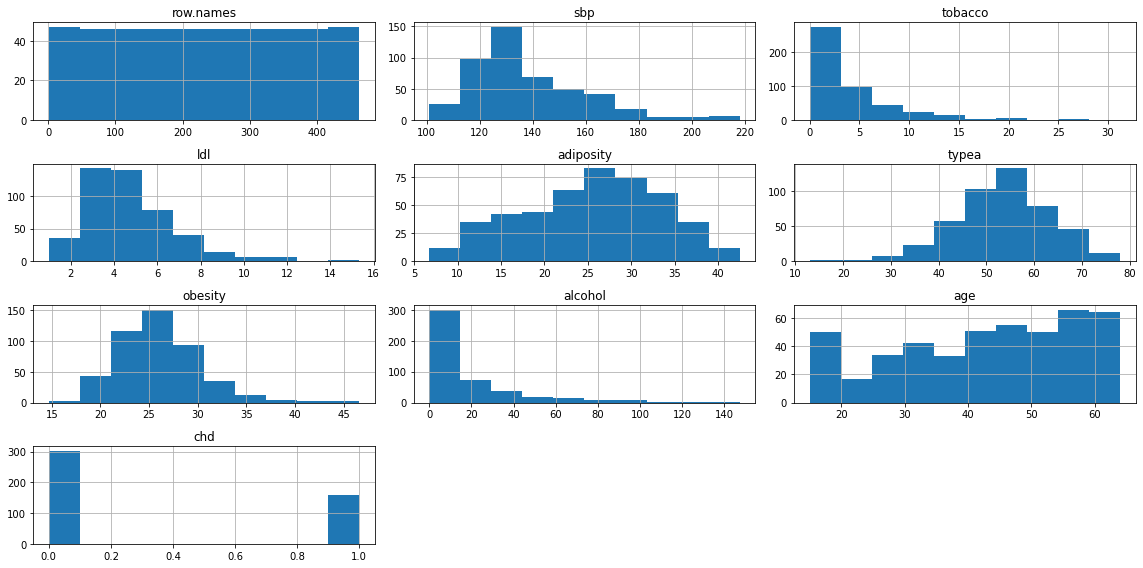

In [216]:
# numerical feature distribution
data_2.hist(figsize = (16,8))
plt.tight_layout();

In [217]:
# processing categorical feature
dict_famhist = {'Absent':0,'Present':1}
data_2['famhist'] = data_2['famhist'].map(dict_famhist)
data_2.head(3)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0


In [218]:
y = data_2['chd']
X = data_2.drop(['row.names','chd'],axis = 1)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.25, stratify = y)

In [220]:
# normalize data into range[0,1]
X_train_scaled = minmaxscaler.fit_transform(X_train)
X_test_scaled = minmaxscaler.transform(X_test)

In [221]:
print('X_train_scaled shape: ',X_train_scaled.shape)
print('X_test_scaled shape: ',X_test_scaled. shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train_scaled shape:  (346, 9)
X_test_scaled shape:  (116, 9)
y_train shape:  (346,)
y_test shape:  (116,)


In [222]:
# train ANN model
# define the layers 
inputs = Input(shape=(9,))
dense1 = Dense(80,activation = 'relu')(inputs)
dense2 = Dense(40, activation = 'relu')(dense1)
dense3 = Dense(25, activation = 'relu')(dense2)
outputs = Dense(1, activation = 'sigmoid')(dense3)

In [224]:
#define the model
model_3 = Model(inputs, outputs)
model_3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_29 (Dense)            (None, 80)                800       
                                                                 
 dense_30 (Dense)            (None, 40)                3240      
                                                                 
 dense_31 (Dense)            (None, 25)                1025      
                                                                 
 dense_32 (Dense)            (None, 1)                 26        
                                                                 
Total params: 5,091
Trainable params: 5,091
Non-trainable params: 0
_________________________________________________________________


In [234]:
# compile the model
model_3.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [235]:
# train the model
history_3 = model_3.fit(X_train_scaled, y_train, batch_size = 32, epochs = 200, verbose = 0)

In [236]:
# evaluate model_3 on test data
evals_accuracy  = model_3.evaluate(X_test_scaled, y_test)
print('Test Accuracy: %5.4f'%(evals_accuracy[1]))

4/4 [==============================] - 0s 1ms/step - loss: 0.8750 - accuracy: 0.6983
Test Accuracy: 0.6983


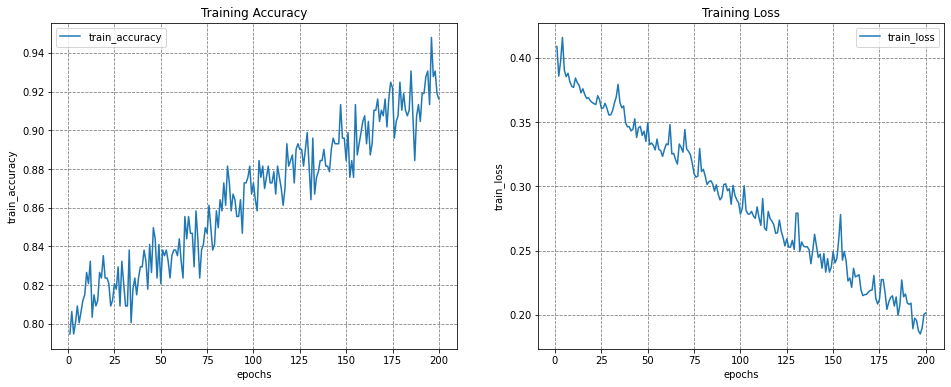

In [237]:
# Plot the learning curve
train_label_accuracy = history_3.history['accuracy']
train_label_loss = history_3.history['loss']
epochsn = np.arange(1,len(train_label_accuracy)+1, 1)

plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
plt.plot(epochsn, train_label_accuracy, label = 'train_accuracy')
plt.xlabel('epochs')
plt.ylabel('train_accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.grid(color = 'grey', linestyle = '--')

plt.subplot(1,2,2)
plt.plot(epochsn, train_label_loss, label = 'train_loss')
plt.xlabel('epochs')
plt.ylabel('train_loss')
plt.title('Training Loss')
plt.grid(color = 'grey', linestyle = '--')
plt.legend()

plt.show()